In [16]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '..')
import pickle
from results_functions import *
from matplotlib.ticker import FormatStrFormatter
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
plt.ioff()
csfont = {'fontname':'Helvetica', 'fontsize':30}
hfont = {'fontname':'Helvetica', 'fontsize':30}
alpha = 0.15

## Room 3x3

(16, 100003)


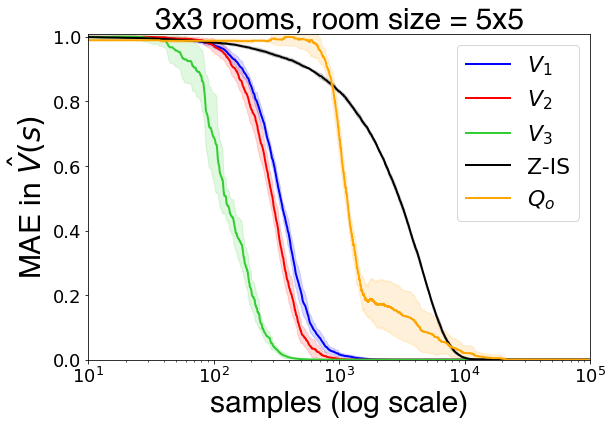

In [19]:
results_dir = '../results'

MAX_N_SAMPLES = int(1e5)
X_LIM = 25

v1_names = ['nroom_3_3_v1_0', 'nroom_3_3_v1_333', 'nroom_3_3_v1_777']
v1_paths = [f'{results_dir}/{n}.pkl' for n in v1_names]

v2_names = ['nroom_3_3_v2_0', 'nroom_3_3_v2_333', 'nroom_3_3_v2_777']
v2_paths = [f'{results_dir}/{n}.pkl' for n in v2_names]

v3_names = ['nroom_3_3_v3_0', 'nroom_3_3_v3_333', 'nroom_3_3_v3_777']
v3_paths = [f'{results_dir}/{n}.pkl' for n in v3_names]

flat_names = ['nroom_3_3_flat_0', 'nroom_3_3_flat_333', 'nroom_3_3_flat_777']
flat_paths = [f'{results_dir}/{n}.pkl' for n in flat_names]

v1_mean, v1_y1, v1_y2 = get_HL_errors(v1_paths, MAX_N_SAMPLES)
v2_mean, v2_y1, v2_y2 = get_HL_errors(v2_paths, MAX_N_SAMPLES)
v3_mean, v3_y1, v3_y2 = get_HL_errors(v3_paths, MAX_N_SAMPLES)
flat_mean, flat_y1, flat_y2 = get_HL_errors(flat_paths, MAX_N_SAMPLES)
vo = np.load(f'{results_dir}/nrooms_3x3.npy')
print(vo.shape)
vo_mean = vo.mean(axis=0)
vo_mean = vo_mean / np.max(vo_mean)
vo_std = (vo / vo.max()).std(axis=0)
vo_y1, vo_y2 = vo_mean + vo_std, vo_mean - vo_std

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)


# VERSION 1
ax.plot(v1_mean, linewidth=2, color='blue', label='$V_1$')
ax.fill_between(range(MAX_N_SAMPLES), v1_y1, v1_y2, color='blue', alpha=alpha)
# VERSION 2
ax.plot(v2_mean, linewidth=2,  color='red', label='$V_2$')
ax.fill_between(range(MAX_N_SAMPLES), v2_y1, v2_y2, color='red', alpha=alpha)
# VERSION 3
ax.plot(v3_mean, linewidth=2,  color='limegreen', label='$V_3$')
ax.fill_between(range(MAX_N_SAMPLES), v3_y1, v3_y2, color='limegreen', alpha=alpha)
# VERSION FLAT
ax.plot(flat_mean, linewidth=2, color='black', label='Z-IS')
ax.fill_between(range(MAX_N_SAMPLES), flat_y1, flat_y2, color='black', alpha=alpha)
# VERSION OPTIONS
ax.plot(vo_mean, linewidth=2, color='orange', label='$Q_o$')
ax.fill_between(range(len(vo_y1)), vo_y1, vo_y2, color='orange', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['$V_1$', '$V_2$', '$V_3$', '$FLAT$']

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e1, 1e5))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat V(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('pictures/nrooms_3_3.pdf', bbox_inches='tight', dpi=500)
plt.show()

## Room 5x5

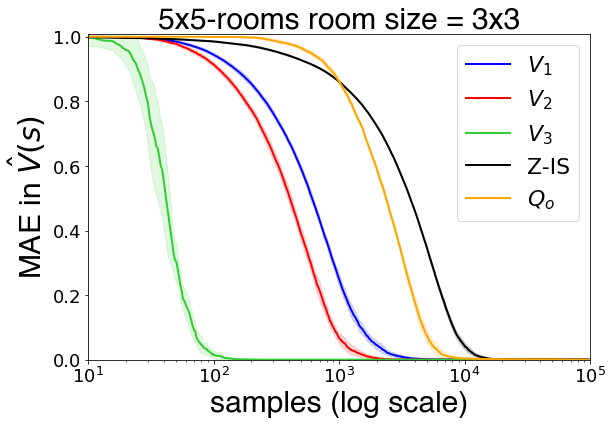

In [14]:
results_dir = '../results'

MAX_N_SAMPLES = int(1e5)
X_LIM = 30 

v1_names = ['nroom_5_5_v1_0', 'nroom_5_5_v1_333', 'nroom_5_5_v1_777']
v1_paths = [f'{results_dir}/{n}.pkl' for n in v1_names]

v2_names = ['nroom_5_5_v2_0', 'nroom_5_5_v2_333', 'nroom_5_5_v2_777']
v2_paths = [f'{results_dir}/{n}.pkl' for n in v2_names]

v3_names = ['nroom_5_5_v3_0', 'nroom_5_5_v3_333', 'nroom_5_5_v3_777']
v3_paths = [f'{results_dir}/{n}.pkl' for n in v3_names]

flat_names = ['nroom_5_5_flat_0', 'nroom_5_5_flat_333', 'nroom_5_5_flat_777']
flat_paths = [f'{results_dir}/{n}.pkl' for n in flat_names]

v1_mean, v1_y1, v1_y2 = get_HL_errors(v1_paths, MAX_N_SAMPLES)
v2_mean, v2_y1, v2_y2 = get_HL_errors(v2_paths, MAX_N_SAMPLES)
v3_mean, v3_y1, v3_y2 = get_HL_errors(v3_paths, MAX_N_SAMPLES)
flat_mean, flat_y1, flat_y2 = get_HL_errors(flat_paths, MAX_N_SAMPLES)

vo = np.load(f'{results_dir}/nrooms_5x5.npy')[:, :MAX_N_SAMPLES]
vo_mean = vo.mean(axis=0)
vo_mean = vo_mean / np.max(vo_mean)
vo_std = (vo / vo.max()).std(axis=0)
vo_y1, vo_y2 = vo_mean + vo_std, vo_mean - vo_std

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'5x5-rooms, room size = 3x3', **csfont)

# VERSION 1
ax.plot(v1_mean, linewidth=2, color='blue', label='$V_1$')
ax.fill_between(range(MAX_N_SAMPLES), v1_y1, v1_y2, color='blue', alpha=alpha)
# VERSION 2
ax.plot(v2_mean, linewidth=2,  color='red', label='$V_2$')
ax.fill_between(range(MAX_N_SAMPLES), v2_y1, v2_y2, color='red', alpha=alpha)
# VERSION 3
ax.plot(v3_mean, linewidth=2,  color='limegreen', label='$V_3$')
ax.fill_between(range(MAX_N_SAMPLES), v3_y1, v3_y2, color='limegreen', alpha=alpha)
# VERSION FLAT
ax.plot(flat_mean, linewidth=2, color='black', label='Z-IS')
ax.fill_between(range(MAX_N_SAMPLES), flat_y1, flat_y2, color='black', alpha=alpha)
# VERSION OPTIONS
ax.plot(vo_mean, linewidth=2, color='orange', label='$Q_o$')
ax.fill_between(range(MAX_N_SAMPLES), vo_y1, vo_y2, color='orange', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['$V_1$', '$V_2$', '$V_3$', '$FLAT$']

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e1, 1e5))

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat V(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('pictures/nrooms_5_5.pdf', bbox_inches='tight', dpi=500)
plt.show()

## 8x8

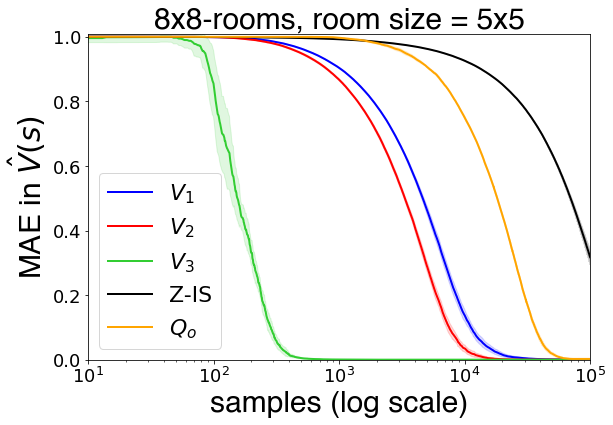

In [15]:
results_dir = '../results'

MAX_N_SAMPLES = int(1e5)

v1_names = ['nroom_8_8_v1_0', 'nroom_8_8_v1_333', 'nroom_8_8_v1_777']
v1_paths = [f'{results_dir}/{n}.pkl' for n in v1_names]

v2_names = ['nroom_8_8_v2_0', 'nroom_8_8_v2_333', 'nroom_8_8_v2_777']
v2_paths = [f'{results_dir}/{n}.pkl' for n in v2_names]

v3_names = ['nroom_8_8_v3_0', 'nroom_8_8_v3_333', 'nroom_8_8_v3_777']
v3_paths = [f'{results_dir}/{n}.pkl' for n in v3_names]

flat_names = ['nroom_8_8_flat_0', 'nroom_8_8_flat_333', 'nroom_8_8_flat_777']
flat_paths = [f'{results_dir}/{n}.pkl' for n in flat_names]

v1_mean, v1_y1, v1_y2 = get_HL_errors(v1_paths, MAX_N_SAMPLES)
v2_mean, v2_y1, v2_y2 = get_HL_errors(v2_paths, MAX_N_SAMPLES)
v3_mean, v3_y1, v3_y2 = get_HL_errors(v3_paths, MAX_N_SAMPLES)
flat_mean, flat_y1, flat_y2 = get_HL_errors(flat_paths, MAX_N_SAMPLES)

vo = np.load(f'{results_dir}/nrooms_8x8.npy')[:, :MAX_N_SAMPLES]
vo_mean = vo.mean(axis=0)
vo_mean = vo_mean / np.max(vo_mean)
vo_std = (vo / vo.max()).std(axis=0)
vo_y1, vo_y2 = vo_mean + vo_std, vo_mean - vo_std

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'8x8-rooms, room size = 5x5', **csfont)
# VERSION 1
ax.plot(v1_mean, linewidth=2, color='blue', label='$V_1$')
ax.fill_between(range(MAX_N_SAMPLES), v1_y1, v1_y2, color='blue', alpha=alpha)
# VERSION 2
ax.plot(v2_mean, linewidth=2,  color='red', label='$V_2$')
ax.fill_between(range(MAX_N_SAMPLES), v2_y1, v2_y2, color='red', alpha=alpha)
# VERSION 3
ax.plot(v3_mean, linewidth=2,  color='limegreen', label='$V_3$')
ax.fill_between(range(MAX_N_SAMPLES), v3_y1, v3_y2, color='limegreen', alpha=alpha)
# VERSION FLAT
ax.plot(flat_mean, linewidth=2, color='black', label='Z-IS')
ax.fill_between(range(MAX_N_SAMPLES), flat_y1, flat_y2, color='black', alpha=alpha)
# VERSION OPTIONS
ax.plot(vo_mean, linewidth=2, color='orange', label='$Q_o$')
ax.fill_between(range(MAX_N_SAMPLES), vo_y1, vo_y2, color='orange', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['$V_1$', '$V_2$', '$V_3$', '$FLAT$']

ax.legend(fontsize=22, loc=3)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e1, 1e5))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat V(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('pictures/nrooms_8_8.pdf', bbox_inches='tight', dpi=500)
plt.show()